script to add a column to the reports determining gene type, and filter for genes qith seqiD > 99%

In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
#define fuction to determine gene type (BLEE, CPO, Other)
def determine_gene_type(gene):
    if gene in list_BLEE:
        return "BLEE"
    elif gene in list_CPO:
        return "CPO"
    else:
        return "Other"
    
os.chdir("/data/bioinfo_doc/research/20240409_TFM-CMARTINEZ_IC-SM_T/20240711_RESULTS/reports_modified")


#Import reference lists.
data_BLEE = pd.read_csv("20240805eq_BLEE.tsv", sep = "\t")
data_CPO = pd.read_csv("20240805eq_CPO.tsv", sep = "\t")

list_BLEE = data_BLEE['blee_modified'].to_list()
list_CPO = data_CPO['cpo_modified'].to_list()

#import output data
ariba_CARD =  pd.read_csv("20240805ariba_CARD_modified.tsv", sep = "\t")
ariba_NCBI = pd.read_csv("20240805ariba_NCBI_modified.tsv", sep = "\t")
ariba_RESFINDER = pd.read_csv("20240805ariba_RESFINDER_modified.tsv", sep = "\t")
abricate_CARD = pd.read_csv("20240805abricate_CARD_modified.tsv", sep = "\t")
abricate_NCBI = pd.read_csv("20240805abricate_NCBI_modified.tsv", sep = "\t")
abricate_RESFINDER = pd.read_csv("20240805abricate_RESFINDER_modified.tsv", sep = "\t")
amrfinderplus_NCBI = pd.read_csv("20240805amrfinderplus_NCBI_modified.tsv", sep = "\t")
rgi_CARD = pd.read_csv("20240805rgi_CARD_modified.tsv", sep = "\t")

os.chdir("../")

#define a dictionary to ease iteration through reports.
all_reports = {
    "ariba_CARD": ariba_CARD,
    "ariba_NCBI": ariba_NCBI,
    "ariba_RESFINDER": ariba_RESFINDER,
    "abricate_CARD": abricate_CARD,
    "abricate_NCBI": abricate_NCBI,
    "abricate_RESFINDER": abricate_RESFINDER,
    "amrfinderplus_NCBI": amrfinderplus_NCBI,
    "rgi_CARD": rgi_CARD
}

In [4]:
#filter to see if the found gene is a BLEE or CPO.
for key, value in all_reports.items():
   all_reports[key]['gene_type'] = all_reports[key]['gene_symbol_modified'].apply(determine_gene_type)
   
#filter for BLEEs and CPOs
all_reports_blees_cpos = {}
for key in all_reports.keys():
    all_reports_blees_cpos[key] = all_reports[key][(all_reports[key]['gene_type'] == "BLEE") | (all_reports[key]['gene_type'] == "CPO")]

In [5]:
# Initialize an empty set to store unique gene_symbol_modified values
unique_genes = set()

# Iterate through each DataFrame in the all_reports dictionary
for key, df in all_reports_blees_cpos.items():
    # Filter the DataFrame for rows where sequence_identity is 99%
    filtered_df = df[df['sequence_identity'] >= 99]
    # Add the unique gene_symbol_modified values to the set
    unique_genes.update(filtered_df['gene_symbol_modified'].unique())

# Convert the set to a list if needed
unique_genes_list = list(unique_genes)

# Print the unique gene_symbol_modified values
print(unique_genes_list)

['SHV_106', 'KPC_3', 'SHV_51', 'SHV_38', 'SHV_67', 'SHV_11', 'TEM_57', 'SHV_161', 'TEM_79', 'SHV_134', 'TEM_1', 'CTX_M_15', 'SHV_172', 'OXA_48', 'NDM_9', 'TEM_122', 'CTX_M_163', 'TEM_185', 'TEM_95', 'SHV_98', 'CTX_M_187', 'SHV_158', 'CMY_2', 'NDM_23', 'SHV_105', 'SHV_12', 'SHV_36', 'VIM_1', 'OXA_405', 'SHV_28', 'TEM_150', 'SHV_182', 'SHV_187', 'CMY_59', 'SHV_8', 'TEM_30', 'SHV_1', 'SHV_120', 'TEM_90', 'SHV_70', 'SHV_145', 'TEM_47', 'SHV_33', 'SHV_155', 'OXA_836', 'OXA_247', 'OXA_17', 'TEM_206', 'VIM_86', 'CTX_M_139']


In [43]:
merged_df_blees_cpos_f99 = pd.read_csv("output_dir/merged_df_blees_cpos_f99.tsv", sep = "\t")
grouped_merged_df_blees_cpos_f99 = merged_df_blees_cpos_f99.groupby(['gene_symbol_modified', 'Tool'])[['gene_symbol_modified', 'Tool']].size().unstack()
grouped_merged_df_blees_cpos_f99 = grouped_merged_df_blees_cpos_f99.fillna(0).reset_index()
grouped_merged_df_blees_cpos_f99.head()

Tool,gene_symbol_modified,abricate_CARD,abricate_NCBI,abricate_RESFINDER,amrfinderplus_NCBI,ariba_CARD,ariba_NCBI,ariba_RESFINDER,rgi_CARD
0,CMY_2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,CMY_59,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,CTX_M_139,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,CTX_M_15,58.0,58.0,58.0,58.0,59.0,59.0,59.0,58.0
4,CTX_M_163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [53]:
result_df = pd.DataFrame(index=unique_genes_list)
# Merge the grouped_merged_df_blees_cpos_f99 DataFrame with the result_df DataFrame
result_df = pd.merge(result_df, grouped_merged_df_blees_cpos_f99, how='left', left_index=True, right_on='gene_symbol_modified')
result_df.set_index('gene_symbol_modified', inplace=True)
result_df.columns = [col.replace("_", "\n") for col in result_df.columns]
result_df = result_df.astype(int)
result_df

,abricate\nCARD,abricate\nNCBI,abricate\nRESFINDER,amrfinderplus\nNCBI,ariba\nCARD,ariba\nNCBI,ariba\nRESFINDER,rgi\nCARD
gene_symbol_modified,,,,,,,,
SHV_106,37,37,37,0,0,0,0,0
KPC_3,13,13,13,13,13,0,13,13
SHV_51,0,0,0,0,0,0,0,1
SHV_38,0,0,0,0,1,1,1,0
SHV_67,0,0,0,0,7,0,7,0
SHV_11,7,7,7,29,0,20,0,29
TEM_57,0,0,0,0,1,0,1,0
SHV_161,0,0,0,0,1,0,0,0
TEM_79,0,0,0,0,4,4,0,0


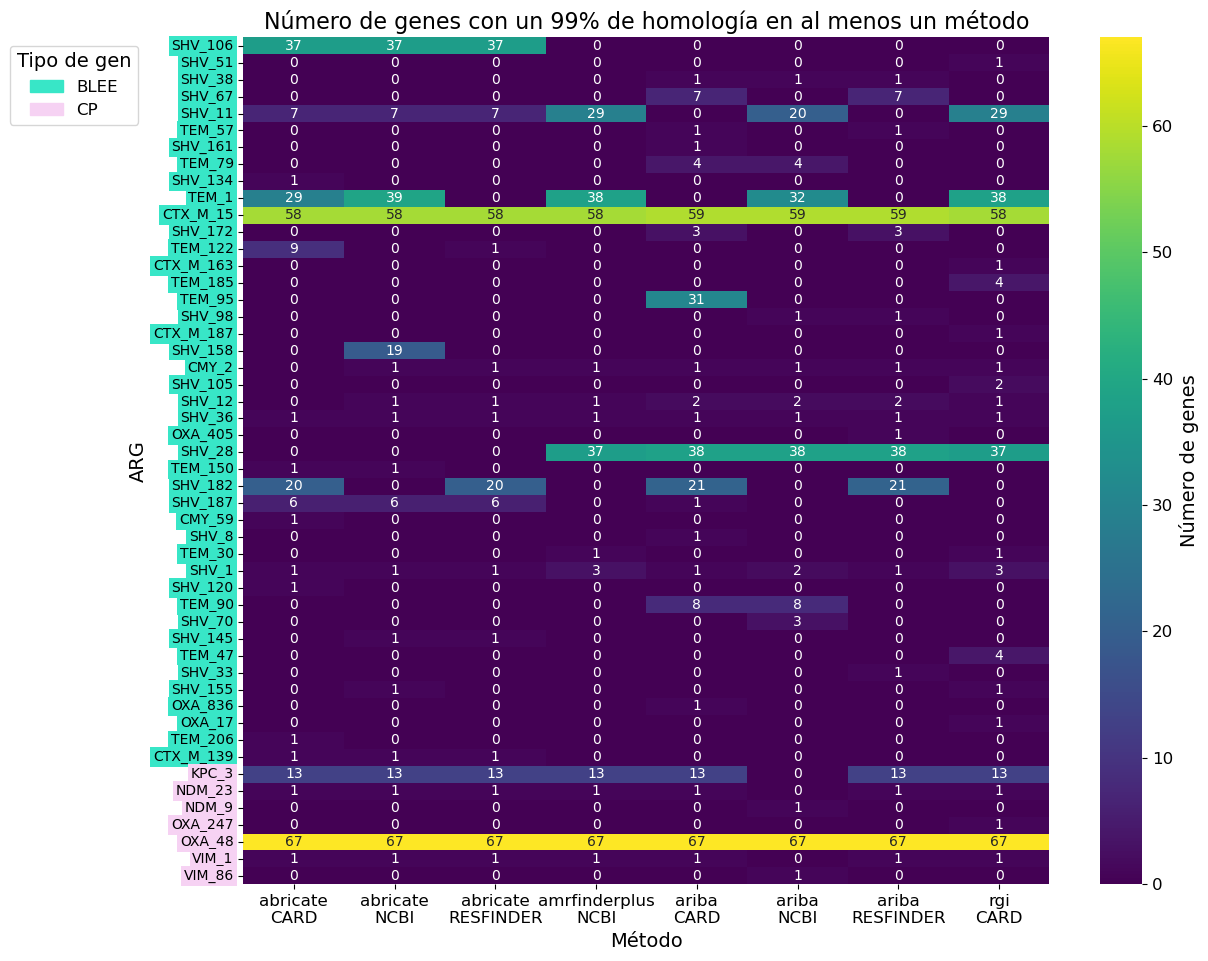

In [54]:
# Reorder the rows in result_df
blee_rows = result_df.index.intersection(list_BLEE)
non_blee_rows = result_df.index.difference(list_BLEE)
ordered_index = blee_rows.tolist() + non_blee_rows.tolist()
result_df = result_df.loc[ordered_index]

# heatmap with the reordered DataFrame
plt.figure(figsize=(13, 11))
heatmap = sns.heatmap(result_df, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Número de genes'})
plt.title('Número de genes con un 99% de homología en al menos un método', fontsize=16)
plt.xlabel('Método', fontsize=14)
plt.ylabel('ARG', fontsize=14)

# Customize the y-tick labels based on BLEE and CP categories
for label in heatmap.get_yticklabels():
    if label.get_text() in list_BLEE:
        label.set_bbox(dict(facecolor='#38e6c7', edgecolor='none', pad=2))
        label.set_color('black')
    else:
        label.set_bbox(dict(facecolor='#f6d2f3', edgecolor='none', pad=2))
        label.set_color('black')

# Adjust tick labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=0, ha='center', fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=10)

# Create and position the legend
legend_patches = [
    mpatches.Patch(color='#38e6c7', label='BLEE'),
    mpatches.Patch(color='#f6d2f3', label='CP')
]
plt.legend(handles=legend_patches, title='Tipo de gen', bbox_to_anchor=(-0.3, 1), loc='upper left', fontsize=12, title_fontsize=14)


cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Número de genes', size=14)

# plt.savefig("output_dir/20240808_heatmap_gene_count_seaborn.png", bbox_inches='tight', format='png', dpi=800)
# plt.savefig("output_dir/20240808_heatmap_gene_count_seaborn.svg", bbox_inches='tight', format='svg')

plt.show()





/tmp/ipykernel_10622/3241091122.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot = result_df2.applymap(lambda x: f'{x:.0f}').round(0)


AttributeError: 'ClusterGrid' object has no attribute 'show'

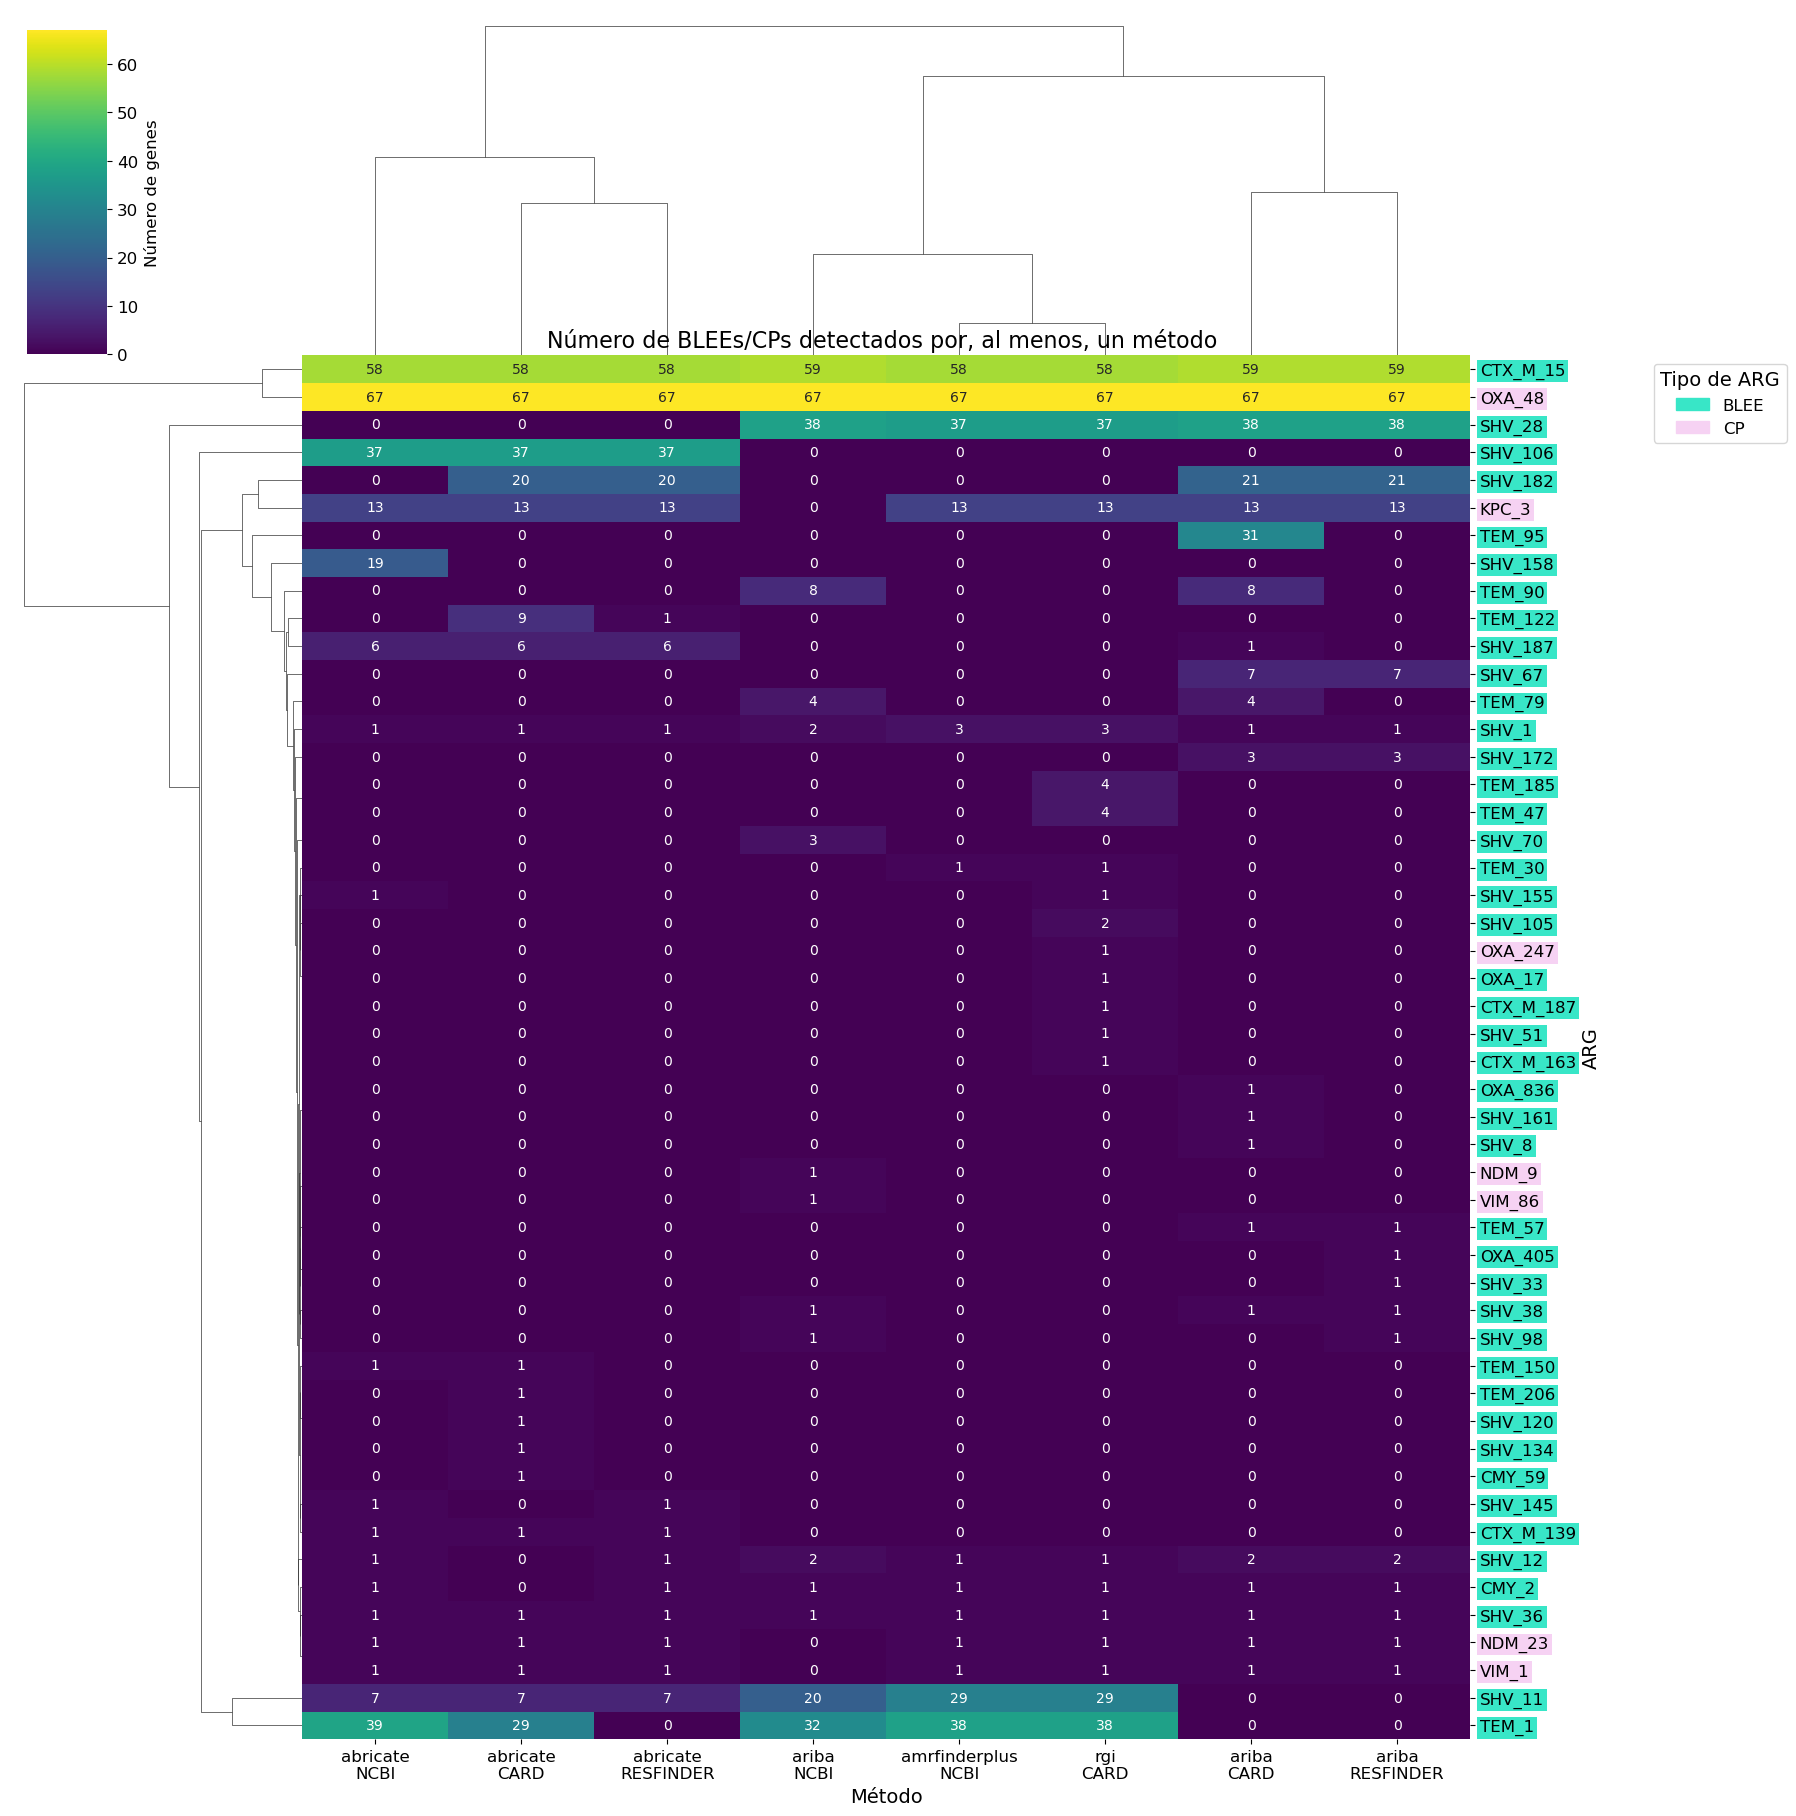

In [60]:
result_df2 = result_df.copy()

#Create a custom annotation array
annot = result_df2.applymap(lambda x: f'{x:.0f}').round(0)

# Create the clustermap
clustermap = sns.clustermap(
    result_df2,
    cmap='viridis',
    annot=annot,
    fmt="",
    cbar_kws={'label': 'Gene count'},
    figsize=(16, 18),
    method='average'
)

# Customize the plot
clustermap.ax_heatmap.set_title('Número de BLEEs/CPs detectados por, al menos, un método ', fontsize=16)
clustermap.ax_heatmap.set_xlabel('Método', fontsize=14)
clustermap.ax_heatmap.set_ylabel('ARG', fontsize=14)

clustermap.ax_heatmap.set_xticklabels(clustermap.ax_heatmap.get_xticklabels(), rotation=0, ha='center', fontsize=12)
clustermap.ax_heatmap.set_yticklabels(clustermap.ax_heatmap.get_yticklabels(), fontsize=12)

for label in clustermap.ax_heatmap.get_yticklabels():
    if label.get_text() in list_BLEE:
        label.set_bbox(dict(facecolor='#38e6c7', edgecolor='none', pad=2))
        label.set_color('black')
    else:
        label.set_bbox(dict(facecolor='#f6d2f3', edgecolor='none', pad=2))
        label.set_color('black')

# Increase the size of the color bar label and ticks
cbar = clustermap.ax_heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)  # Increase tick size
cbar.set_label('Número de genes', size=14)  # Increase label size


# heatmap = sns.heatmap(heatmap_data, cmap='coolwarm', fmt="", annot=annot, cbar_kws={'label': 'Porcentaje de SeqID'})


for label in clustermap.ax_heatmap.get_yticklabels():
    if label.get_text() in list_BLEE:
        label.set_bbox(dict(facecolor='#38e6c7', edgecolor='none', pad=2))
        label.set_color('black')
    else:
        label.set_bbox(dict(facecolor='#f6d2f3', edgecolor='none', pad=2))
        label.set_color('black')


# Increase the size of the color bar label and ticks
cbar = clustermap.ax_heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)  # Increase tick size
cbar.set_label('Número de genes', size=12)  # Increase label size


# Create custom legend
legend_patches = [
    mpatches.Patch(color='#38e6c7', label='BLEE'),
    mpatches.Patch(color='#f6d2f3', label='CP')
]

clustermap.ax_heatmap.legend(handles=legend_patches, title='Tipo de ARG', bbox_to_anchor=(1.15, 1), loc='upper left', fontsize=12, title_fontsize=14)


# Save the plot to a file
clustermap.savefig("output_dir/20240809_clustered_heatmap_gene_count_seaborn.png", dpi = 300, bbox_inches='tight')
clustermap.savefig("output_dir/20240809_clustered_heatmap_gene_count_seaborn.svg", dpi = 300, bbox_inches='tight')

# Display the plot within the notebook
clustermap.show()